# Aprendizado por reforço - Raposas Laranjas

Fernando Schettini
---

![fox](https://drive.google.com/file/d/1sFmFEUJ748_fxWCqhWgjofXqW_l3U-9i/view?usp=sharing)

**Problema:** O zoólogo Fernando tem um grupo de raposas laranjas de diferentes espécies em uma determinada área geográfica. Cada raposa pertence a uma espécie específica e as raposas da mesma espécie não podem compartilhar o mesmo território, pois são territoriais e não interagem bem quando estão próximas umas das outras.

**Objetivo:**  Encontrar uma coloração válida para o grafo, onde nenhum par de vértices conectados tem a mesma cor. De forma que os territórios (ou cores) para as raposas (vértices) da mesma espécie (arestas) não compartilhem o mesmo território, usando o menor número possível de territórios para alcançar essa separação.

 Encontrar a coloração mínima é um problema NP-difícil para a maioria dos grafos, o que significa que não existe um algoritmo conhecido que possa resolvê-lo de forma eficiente para todos os grafos.

**Espaço de Estados:**  É definido por todas as possíveis combinações de cores para os vértices do grafo. Para um grafo com $N$ vértices e  $C$ cores possíveis, cada vértice pode ser colorido de  $C$ maneiras diferentes. Portanto, o espaço total de estados é $C^N$.

**Ações:** Neste caso, a transição ocorre ao alterar a cor de um vértice. A ação tomada é escolher um vértice e mudar sua cor para a próxima na sequência (modularmente).

**Desempenho:**

- Completeza: Com episódios suficientes e hiperparametros adequados o algoritmo tem uma maior chance de convergir para uma solução válida, se existir.
- Ótimo: Não garante a melhor resposta.
- Complexidade de Espaço: Influenciada pelo tamanho da tabela Q, que cresce exponencialmente com o número de vértices e cores ($C^N . N$).
- Complexidade de Tempo: Depende.

**Justificativa:** Q learning pode explorar uma variedade de soluções e aprender a evitar estratégias de coloração que levam a impasses ou soluções ineficientes.

**Desvantagem:** Alocação de memória impossbilita o método tradicional para grafos grandes.

In [ ]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
from collections import deque

In [ ]:
class QGraphColoringAgent:
    def __init__(self, num_vertices, num_colors, graph=None):
        self.num_vertices = num_vertices
        self.num_colors = num_colors
        if graph == None:
            self.graph = nx.erdos_renyi_graph(n=num_vertices, p=0.5)
        else:
            self.graph = graph
        # Q-Learning
        self.q_table = np.zeros((num_colors ** num_vertices, num_vertices)) # Vértices X Possíveis colorações
        self.learning_rate = 0.8
        self.discount_factor = 0.9
        self.epsilon = 0.1

    def state_to_index(self, state):
        index = 0
        for i in range(len(state)):
            index += state[i] * (self.num_colors ** i)
        return index

    def index_to_state(self, index):
        state = []
        for i in range(self.num_vertices):
            color = index % self.num_colors
            state.append(color)
            index //= self.num_colors
        return state

    def is_valid_coloring(self, state):
        for u, v in self.graph.edges():
            if state[u] == state[v]:
                return False
        return True

    def choose_action(self, state, explore=True):
        if explore and random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.num_vertices - 1)
        else:
            state_index = self.state_to_index(state)
            return np.argmax(self.q_table[state_index])

    def update_q_table(self, state, action, reward, next_state): # BellMan's Equation
        state_index = self.state_to_index(state)
        next_state_index = self.state_to_index(next_state)
        best_next_action = np.argmax(self.q_table[next_state_index])
        td_target = reward + self.discount_factor * self.q_table[next_state_index][best_next_action]
        td_error = td_target - self.q_table[state_index][action]
        self.q_table[state_index][action] += self.learning_rate * td_error

    def train(self, episodes, max_steps_per_episode):
        for episode in range(episodes):
            state = [0] * self.num_vertices
            for _ in range(max_steps_per_episode):
                action = self.choose_action(state)
                new_state = state.copy()
                new_state[action] = (new_state[action] + 1) % self.num_colors
                reward = 1 if self.is_valid_coloring(new_state) else -1
                self.update_q_table(state, action, reward, new_state)
                state = new_state

                if self.is_valid_coloring(state):
                    break

    def print_q_table(self):
        for row in self.q_table:
            print(row)

    def reset_q_table(self):
        self.q_table = np.zeros((self.num_colors ** self.num_vertices, self.num_vertices))

    def get_coloring(self):
        state = [0] * self.num_vertices
        for _ in range(100):
            action = self.choose_action(state, explore=False)
            state[action] = (state[action] + 1) % self.num_colors
            if self.is_valid_coloring(state):
                return state
        return None

    def set_numcolors(self, num_colors):
        self.num_colors = num_colors

    def draw_graph(self):
        coloring = self.get_coloring()
        colors = ['#FFA07A', '#FA8072', '#E9967A', '#F08080', '#FF7F50', '#FF6347', '#FF4500', '#FF8C00', '#FFA500', '#FFD700', '#FFB347', '#FF9C00', '#FF8800', '#FF7518', '#E68A00', '#D2691E', '#CD5C5C', '#C04000', '#B22222', '#A52A2A']

        node_colors = [colors[color] for color in coloring] if coloring else ['gray'] * self.num_vertices
        nx.draw(self.graph, with_labels=True, node_color=node_colors, node_size=800, font_size=16)
        plt.show()

Não foi possível colorir o grafo usando Q e 1 cores.
Não foi possível colorir o grafo usando Q e 2 cores.
Não foi possível colorir o grafo usando Q e 3 cores.
Não foi possível colorir o grafo usando Q e 4 cores.


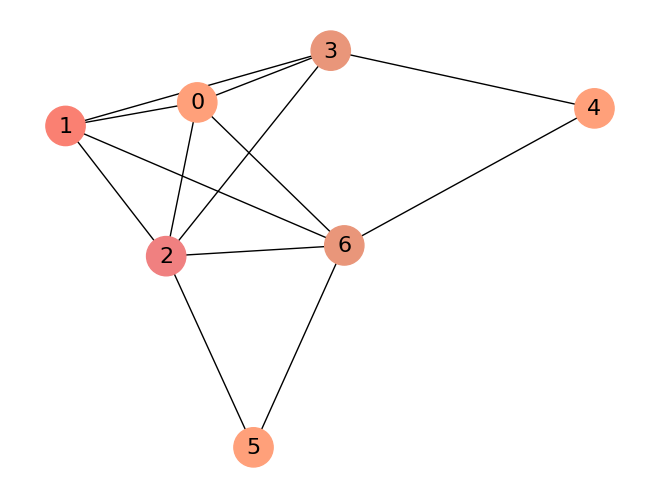

Tempo de execução:(11.478886604309082, 5)


In [ ]:
def Q_sample(num_vertices,graph):
    cores = -1
    if num_vertices > 7:
        tents = 200
    else:
        tents = 100
    agent = QGraphColoringAgent(num_vertices, 1, graph)
    ini = time.time()
    for _ in range(1,num_vertices):
        agent.set_numcolors(_)
        agent.reset_q_table()
        agent.train(episodes=1000, max_steps_per_episode=100)
        if agent.get_coloring() == None:
            print(f"Não foi possível colorir o grafo usando Q e {_} cores.")
        else:
            cores = _
            break
    fim = time.time()

    agent.draw_graph()
    return fim - ini, cores

num_vertices = 7
graph = nx.erdos_renyi_graph(n=num_vertices, p=0.5)
print(f"Tempo de execução:{Q_sample(num_vertices, graph)}")

In [ ]:
learning_rates = [0.25, 0.50, 0.75, 1]
discount_factors = [0.25, 0.50, 0.75, 1]
epsilons = [0.25, 0.50, 0.75, 1]
num_vertices_list = list(range(1, 10))

def analyze_hyperparameters(learning_rates, discount_factors, epsilons, num_vertices_list):
    results = []
    for num_vertices in num_vertices_list:
        agent = QGraphColoringAgent(num_vertices, 0)
        for lr in learning_rates:
            for df in discount_factors:
                for eps in epsilons:
                    ini = time.time()
                    color_fim = -1
                    for color in range(1, num_vertices):
                        agent.learning_rate = lr
                        agent.discount_factor = df
                        agent.set_numcolors(color)
                        agent.reset_q_table()
                        agent.train(episodes=1000, max_steps_per_episode=100)
                        if agent.get_coloring() is not None:
                            color_fim = color
                            break
                    fim = time.time()
                    duration = fim - ini
                    results.append((num_vertices, lr, df, eps, duration, color_fim))
    return results

resultados = analyze_hyperparameters(learning_rates, discount_factors, epsilons, num_vertices_list)
print(resultados)


[(1, 0.25, 0.25, 0.25, 1.1920928955078125e-06, -1), (1, 0.25, 0.25, 0.5, 9.5367431640625e-07, -1), (1, 0.25, 0.25, 0.75, 4.76837158203125e-07, -1), (1, 0.25, 0.25, 1, 7.152557373046875e-07, -1), (1, 0.25, 0.5, 0.25, 4.76837158203125e-07, -1), (1, 0.25, 0.5, 0.5, 4.76837158203125e-07, -1), (1, 0.25, 0.5, 0.75, 4.76837158203125e-07, -1), (1, 0.25, 0.5, 1, 4.76837158203125e-07, -1), (1, 0.25, 0.75, 0.25, 4.76837158203125e-07, -1), (1, 0.25, 0.75, 0.5, 7.152557373046875e-07, -1), (1, 0.25, 0.75, 0.75, 7.152557373046875e-07, -1), (1, 0.25, 0.75, 1, 4.76837158203125e-07, -1), (1, 0.25, 1, 0.25, 9.5367431640625e-07, -1), (1, 0.25, 1, 0.5, 4.76837158203125e-07, -1), (1, 0.25, 1, 0.75, 4.76837158203125e-07, -1), (1, 0.25, 1, 1, 2.384185791015625e-07, -1), (1, 0.5, 0.25, 0.25, 1.1920928955078125e-06, -1), (1, 0.5, 0.25, 0.5, 4.76837158203125e-07, -1), (1, 0.5, 0.25, 0.75, 4.76837158203125e-07, -1), (1, 0.5, 0.25, 1, 4.76837158203125e-07, -1), (1, 0.5, 0.5, 0.25, 2.384185791015625e-07, -1), (1, 0

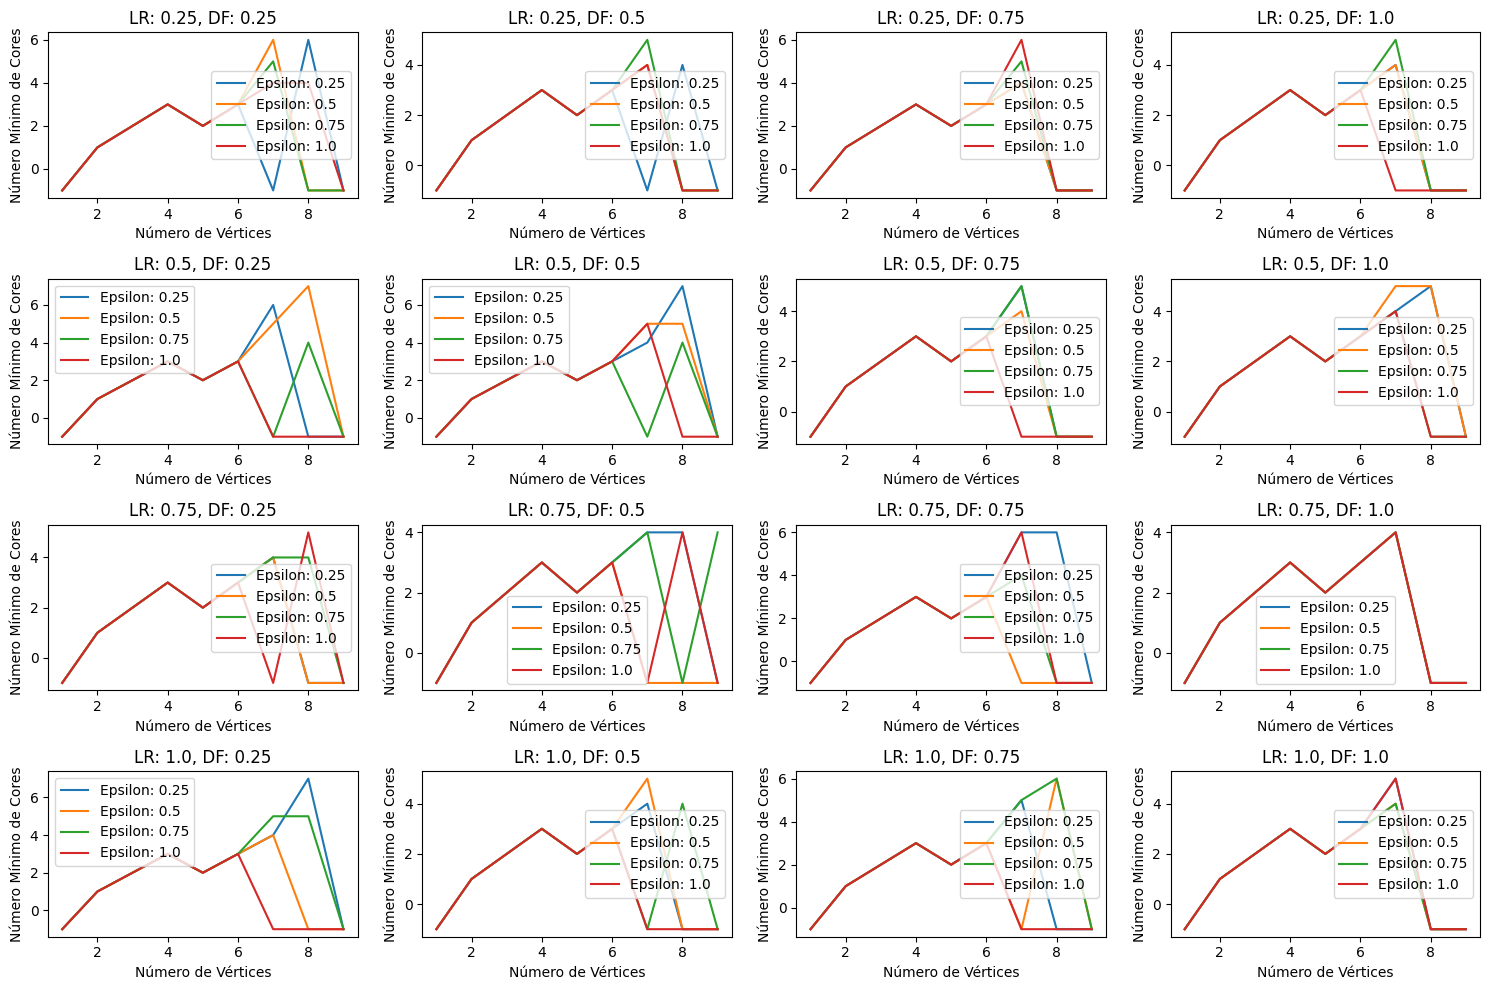

In [ ]:
results_array = np.array(resultados)

learning_rates = np.unique(results_array[:, 1])
discount_factors = np.unique(results_array[:, 2])
epsilons = np.unique(results_array[:, 3])

fig, ax = plt.subplots(len(learning_rates), len(discount_factors), figsize=(15, 10))

for i, lr in enumerate(learning_rates):
    for j, df in enumerate(discount_factors):
        filtered_data = results_array[(results_array[:, 1] == lr) & (results_array[:, 2] == df)]

        for eps in epsilons:
            eps_data = filtered_data[filtered_data[:, 3] == eps]
            ax[i, j].plot(eps_data[:, 0], eps_data[:, 5], label=f'Epsilon: {eps}')

        ax[i, j].set_title(f'LR: {lr}, DF: {df}')
        ax[i, j].set_xlabel('Número de Vértices')
        ax[i, j].set_ylabel('Número Mínimo de Cores')
        ax[i, j].legend()

plt.tight_layout()
plt.show()

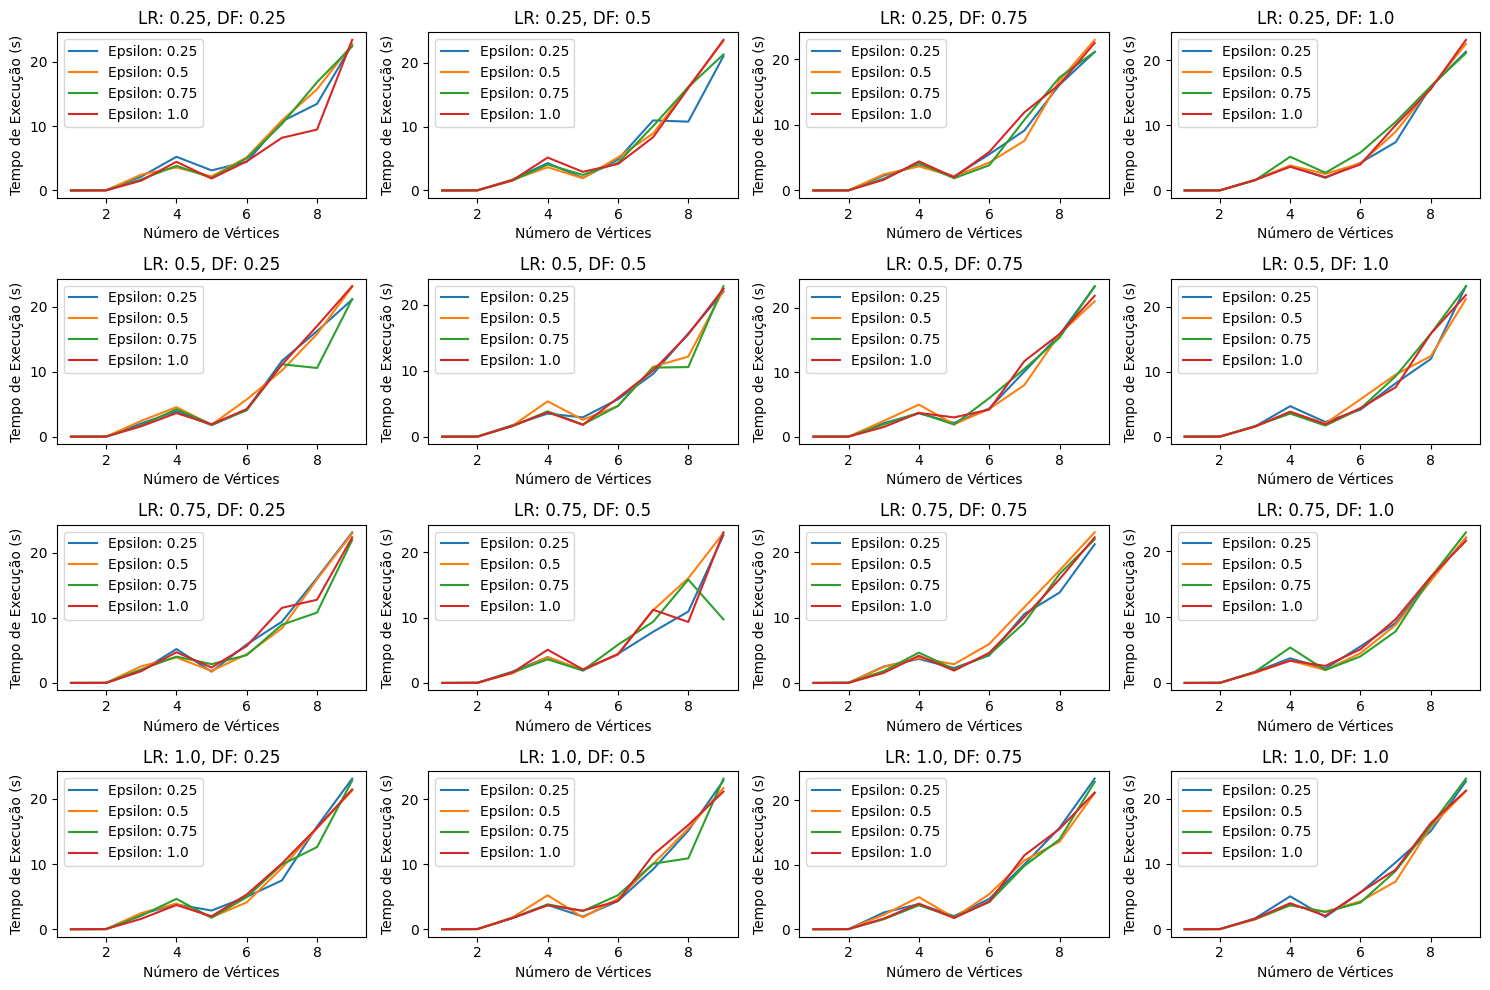

In [ ]:
results_array = np.array(resultados)

learning_rates = np.unique(results_array[:, 1])
discount_factors = np.unique(results_array[:, 2])
epsilons = np.unique(results_array[:, 3])

fig, ax = plt.subplots(len(learning_rates), len(discount_factors), figsize=(15, 10))

for i, lr in enumerate(learning_rates):
    for j, df in enumerate(discount_factors):
        filtered_data = results_array[(results_array[:, 1] == lr) & (results_array[:, 2] == df)]

        for eps in epsilons:
            eps_data = filtered_data[filtered_data[:, 3] == eps]
            ax[i, j].plot(eps_data[:, 0], eps_data[:, 4], label=f'Epsilon: {eps}')

        ax[i, j].set_title(f'LR: {lr}, DF: {df}')
        ax[i, j].set_xlabel('Número de Vértices')
        ax[i, j].set_ylabel('Tempo de Execução (s)')
        ax[i, j].legend()

plt.tight_layout()
plt.show()

# Busca Não Informada:

**Desempenho:**

- Completeza: Garante a resposta, se existir.
- Ótimo: Não necessariamente, mas neste caso sim.
- Complexidade de Tempo: $O(C^N)$  
- Complexidade de Espaço: $O(C \cdot N)$

**Justificativa:** DFS é simples e eficiente, tornando-o uma boa escolha para a primeira fase de um processo de coloração de grafos, onde é necessário compreender a estrutura do grafo.

In [ ]:
class SGraphColoringAgent:
    def __init__(self, num_vertices, num_colors, graph=None):
        self.num_vertices = num_vertices
        self.num_colors = num_colors
        if graph == None:
            self.graph = nx.erdos_renyi_graph(n=num_vertices, p=0.5)
        else:
            self.graph = graph
        self.colors = [-1] * num_vertices

    def is_valid_coloring(self, vertex, color):
        for neighbor in self.graph.neighbors(vertex):
            if self.colors[neighbor] == color:
                return False
        return True

    def try_coloring_from_each_vertex(self):
        for start_vertex in range(self.num_vertices):
            self.colors = [-1] * self.num_vertices
            if self.color_graph_dfs(start_vertex):
                return True
        return False

    def color_graph_dfs(self, vertex):
        #print(self.colors)
        if -1 not in self.colors:
            return True

        for color in range(self.num_colors):
            if self.is_valid_coloring(vertex, color):
                self.colors[vertex] = color
                if self.color_graph_dfs((vertex + 1) % self.num_vertices):
                    return True
                self.colors[vertex] = -1

        return False

    def set_numcolors(self, num_colors):
        self.num_colors = num_colors

    def print_solution(self):
        if -1 not in self.colors:
            print("Uma solução de coloração válida:", self.colors)
        else:
            print("Não foi possível encontrar uma solução válida")

    def draw_graph(self):
        color_map = ['#FFA07A', '#FA8072', '#E9967A', '#F08080', '#FF7F50', '#FF6347', '#FF4500', '#FF8C00', '#FFA500', '#FFD700', '#FFB347', '#FF9C00', '#FF8800', '#FF7518', '#E68A00', '#D2691E', '#CD5C5C', '#C04000', '#B22222', '#A52A2A']
        node_colors = [color_map[self.colors[i]] if self.colors[i] != -1 else 'black' for i in range(self.num_vertices)]
        nx.draw(self.graph, with_labels=True, node_color=node_colors, font_weight='bold', node_size=700)
        plt.show()

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.


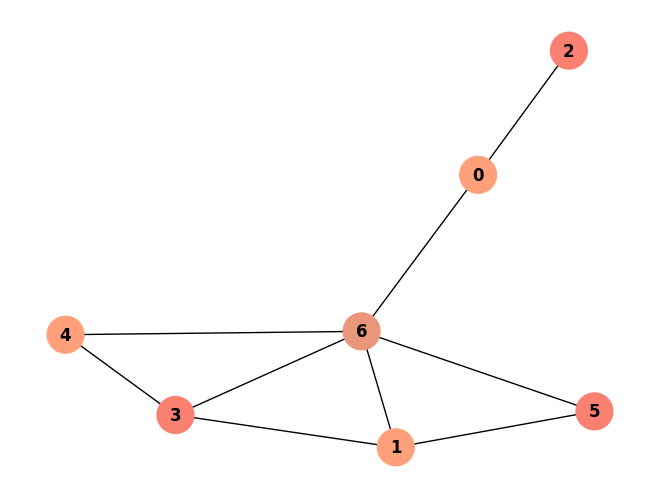

Tempo de execução:(0.20009756088256836, 3)


In [ ]:
def DFS_sample(num_vertices, graph):
    cores = -1
    agent = SGraphColoringAgent(num_vertices, 1, graph)

    ini = time.time()
    for _ in range(0,num_vertices):
        agent.set_numcolors(_)
        if agent.try_coloring_from_each_vertex():
            agent.draw_graph()
            cores = _
            break
        else:
            print(f"Não foi possível colorir o grafo usando DFS e {_} cores.")

    fim = time.time()
    return fim - ini, cores

print(f"Tempo de execução:{DFS_sample(num_vertices,graph)}")

## Comparação dos resultados:

### Tempo e qualidade de Solução:

Não foi possível colorir o grafo usando DFS e 0 cores.


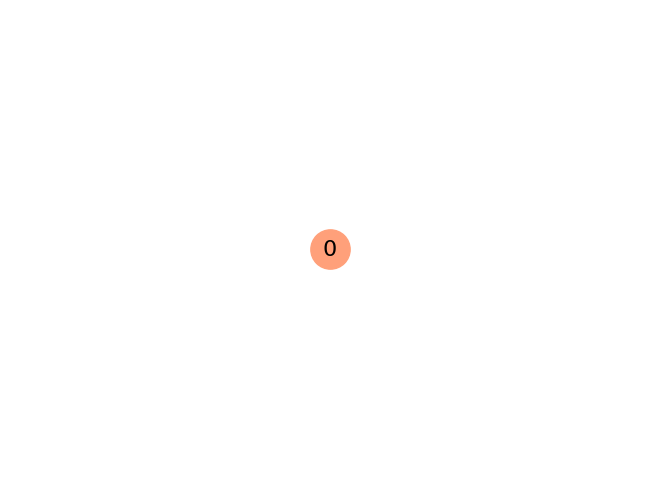

Não foi possível colorir o grafo usando DFS e 0 cores.


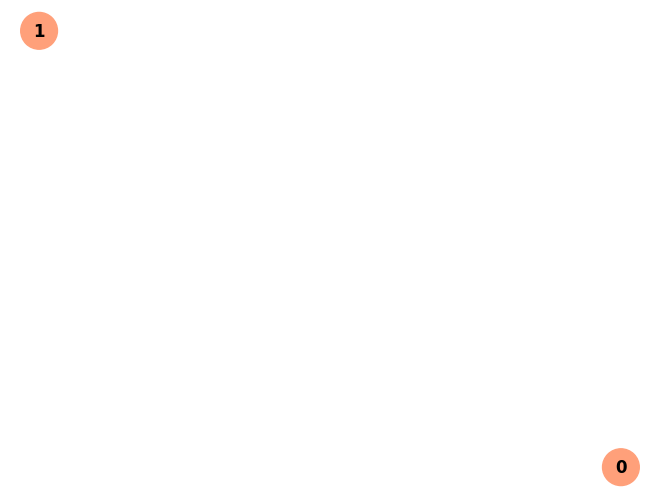

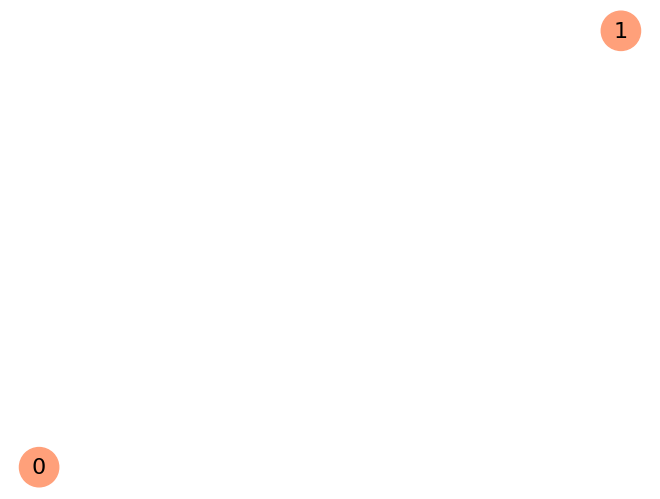

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.


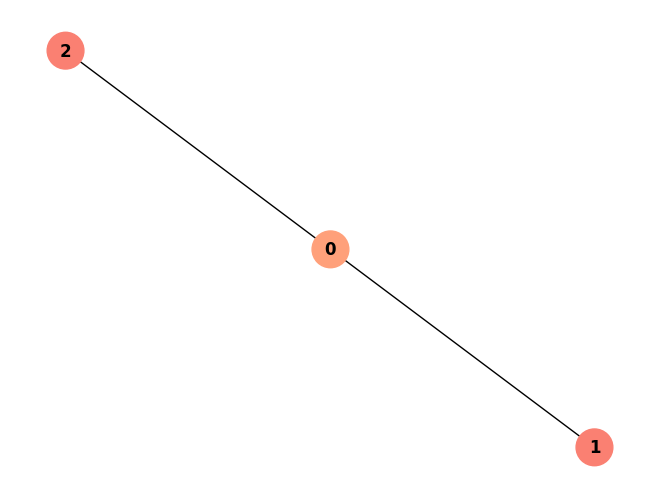

Não foi possível colorir o grafo usando Q e 1 cores.


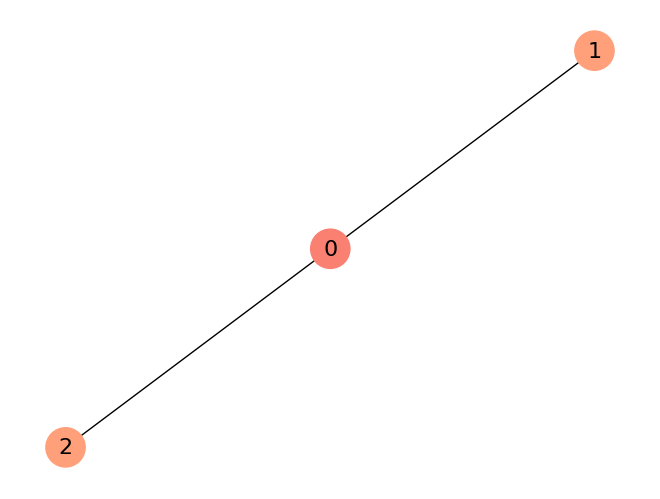

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.


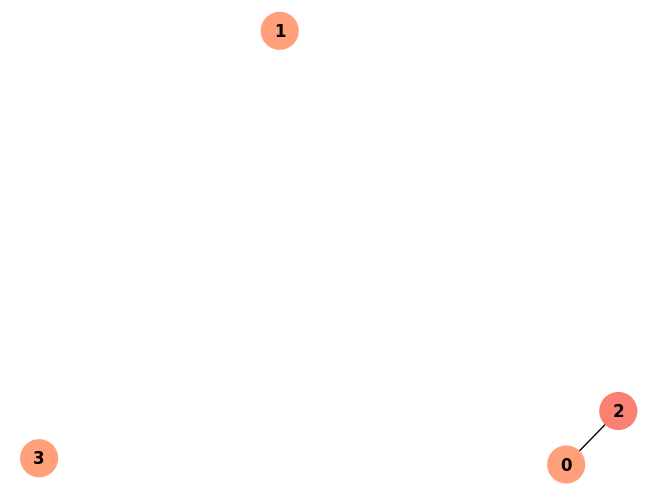

Não foi possível colorir o grafo usando Q e 1 cores.


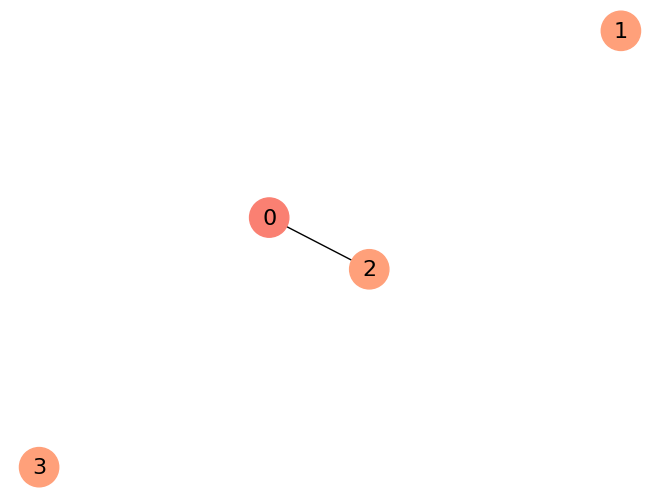

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.


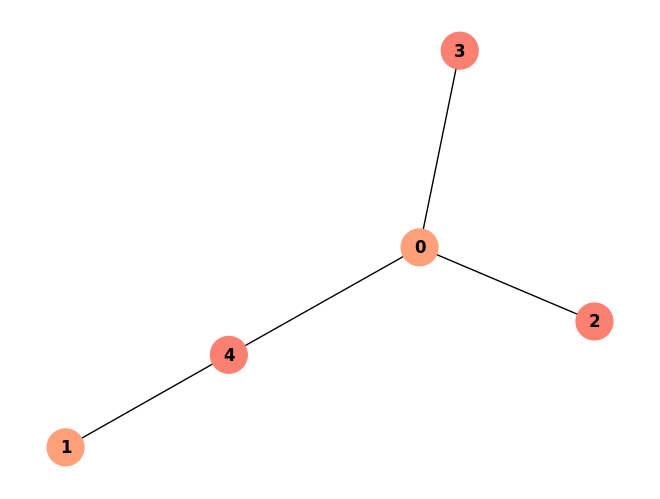

Não foi possível colorir o grafo usando Q e 1 cores.


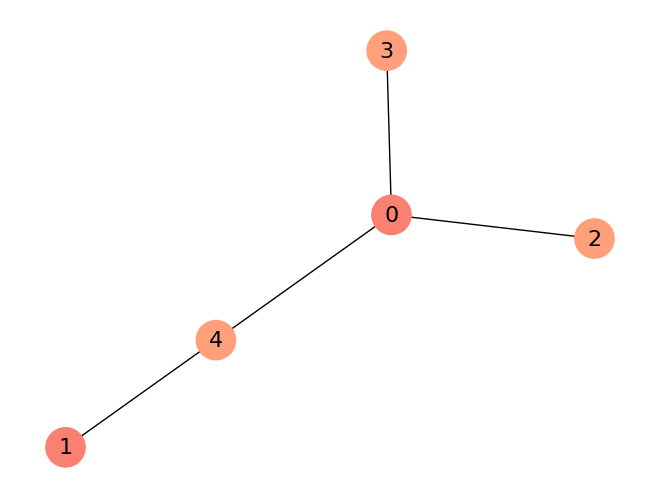

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.


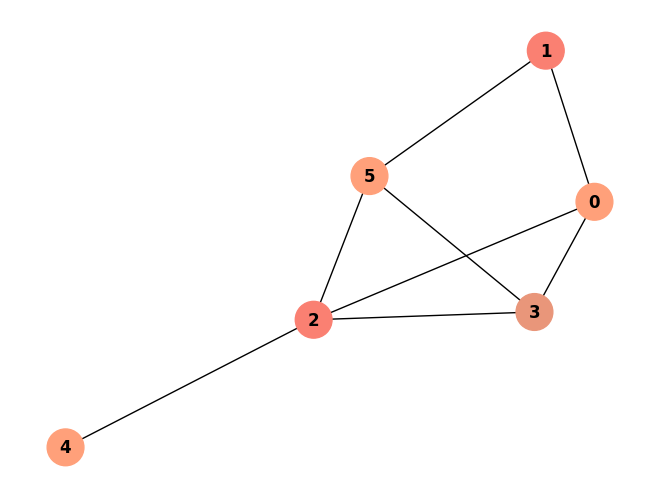

Não foi possível colorir o grafo usando Q e 1 cores.
Não foi possível colorir o grafo usando Q e 2 cores.


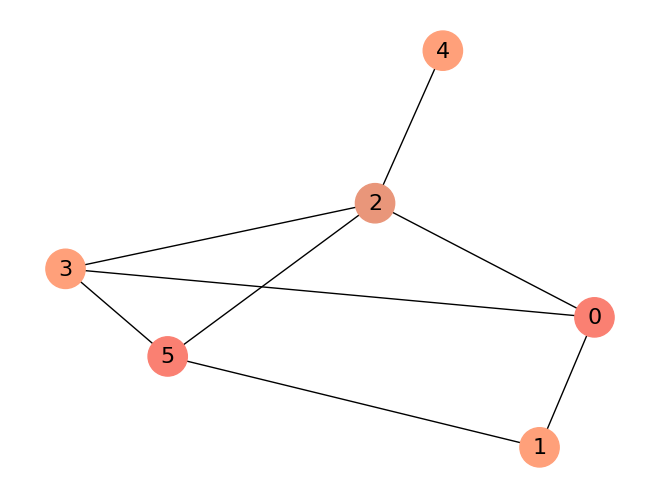

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.


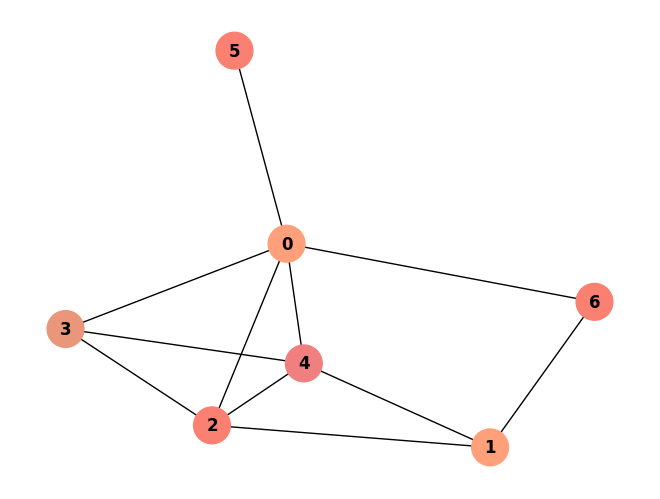

Não foi possível colorir o grafo usando Q e 1 cores.
Não foi possível colorir o grafo usando Q e 2 cores.
Não foi possível colorir o grafo usando Q e 3 cores.


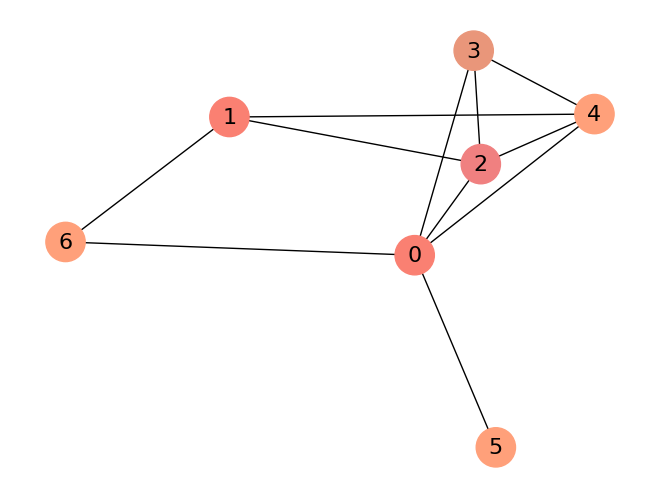

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.


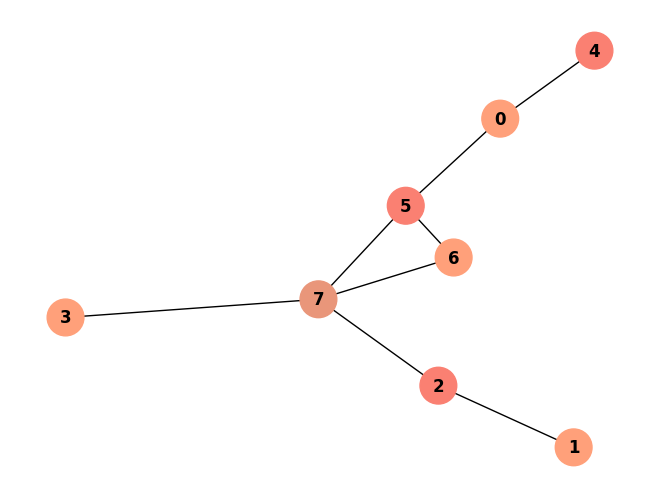

Não foi possível colorir o grafo usando Q e 1 cores.
Não foi possível colorir o grafo usando Q e 2 cores.


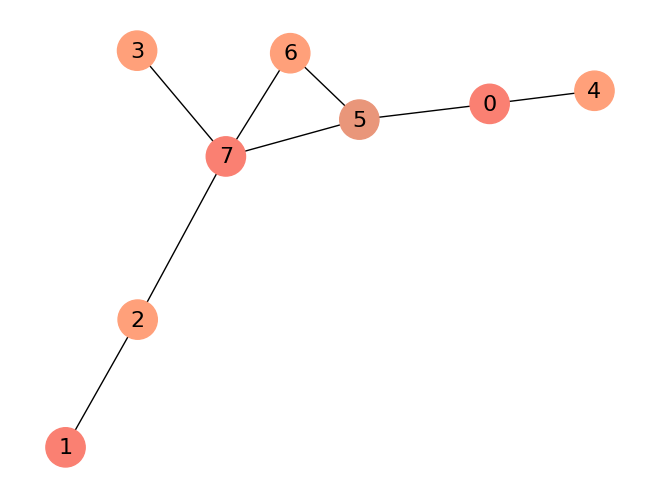

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.


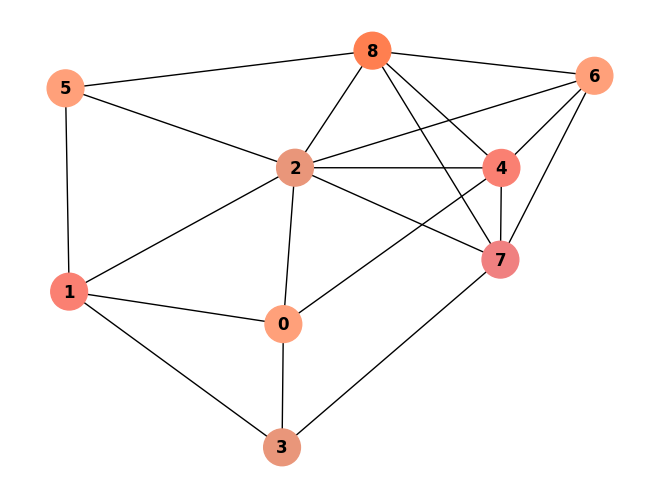

Não foi possível colorir o grafo usando Q e 1 cores.
Não foi possível colorir o grafo usando Q e 2 cores.
Não foi possível colorir o grafo usando Q e 3 cores.
Não foi possível colorir o grafo usando Q e 4 cores.
Não foi possível colorir o grafo usando Q e 5 cores.
Não foi possível colorir o grafo usando Q e 6 cores.
Não foi possível colorir o grafo usando Q e 7 cores.
Não foi possível colorir o grafo usando Q e 8 cores.


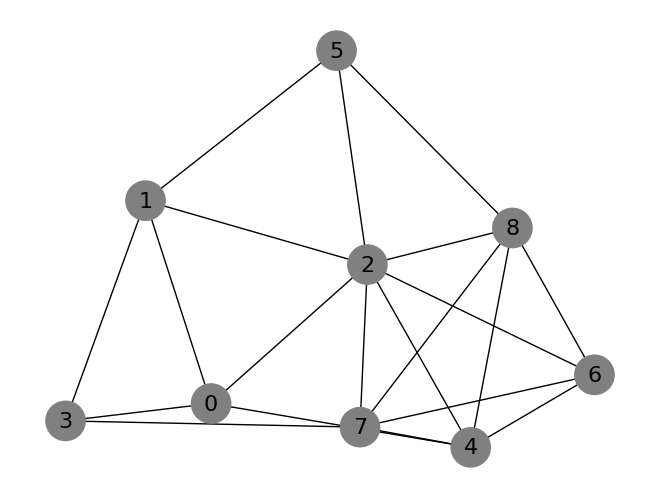

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.


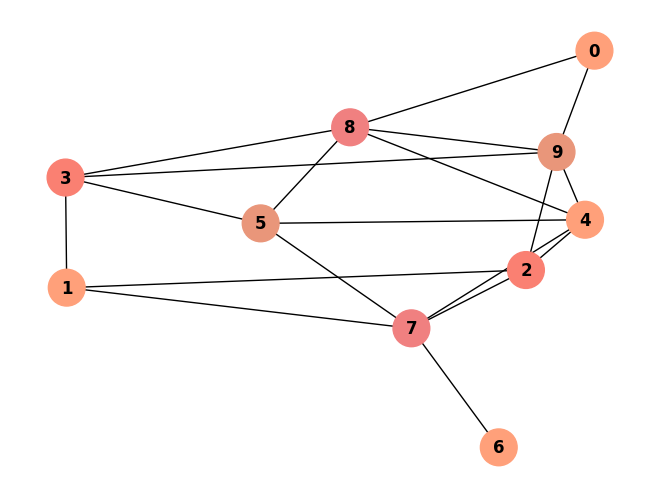

Não foi possível colorir o grafo usando Q e 1 cores.
Não foi possível colorir o grafo usando Q e 2 cores.
Não foi possível colorir o grafo usando Q e 3 cores.
Não foi possível colorir o grafo usando Q e 4 cores.
Não foi possível colorir o grafo usando Q e 5 cores.
Não foi possível colorir o grafo usando Q e 6 cores.
Não foi possível colorir o grafo usando Q e 7 cores.
Não foi possível colorir o grafo usando Q e 8 cores.
Não foi possível colorir o grafo usando Q e 9 cores.


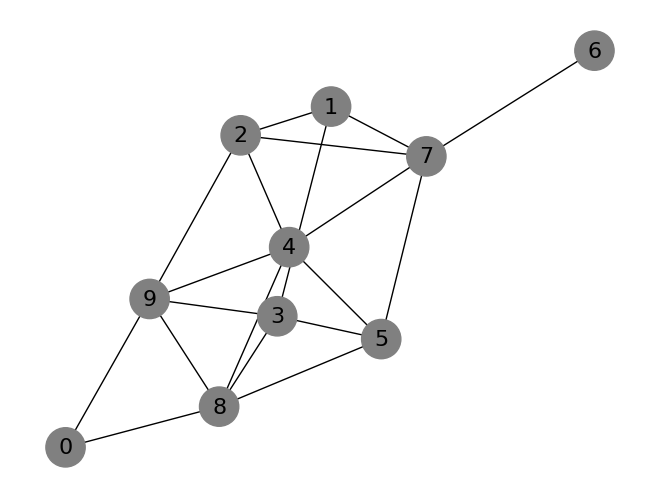

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.


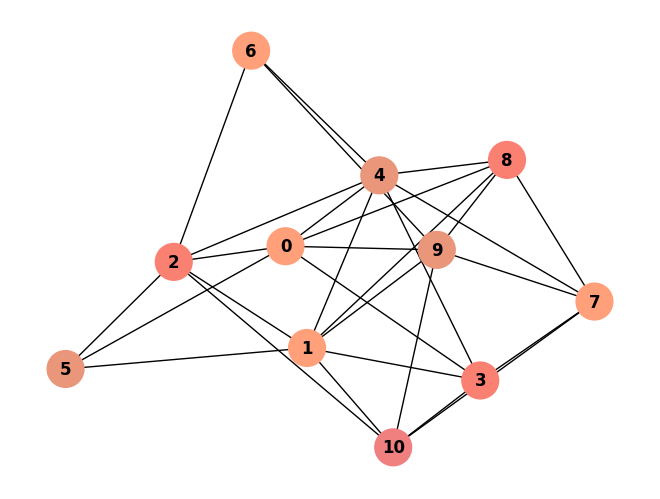

Não foi possível colorir o grafo usando Q e 1 cores.
Não foi possível colorir o grafo usando Q e 2 cores.
Não foi possível colorir o grafo usando Q e 3 cores.
Não foi possível colorir o grafo usando Q e 4 cores.
Não foi possível colorir o grafo usando Q e 5 cores.
Não foi possível colorir o grafo usando Q e 6 cores.
Não foi possível colorir o grafo usando Q e 7 cores.
Não foi possível colorir o grafo usando Q e 8 cores.
Não foi possível colorir o grafo usando Q e 9 cores.
Não foi possível colorir o grafo usando Q e 10 cores.


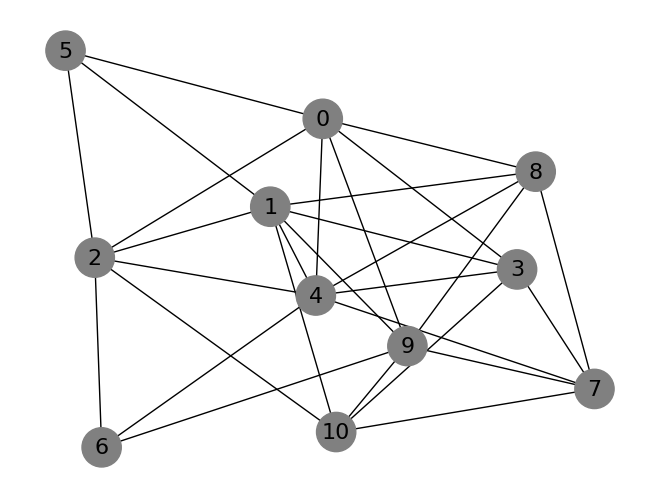

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.


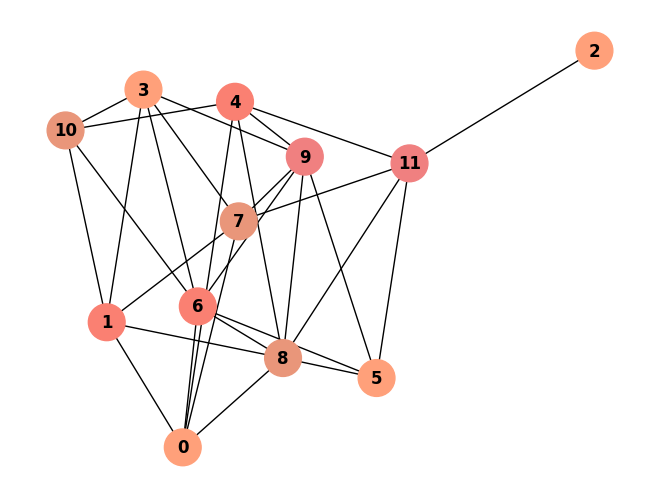

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.


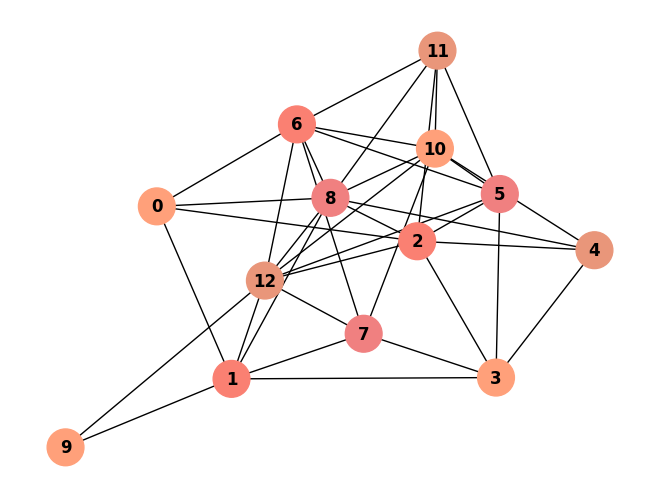

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.


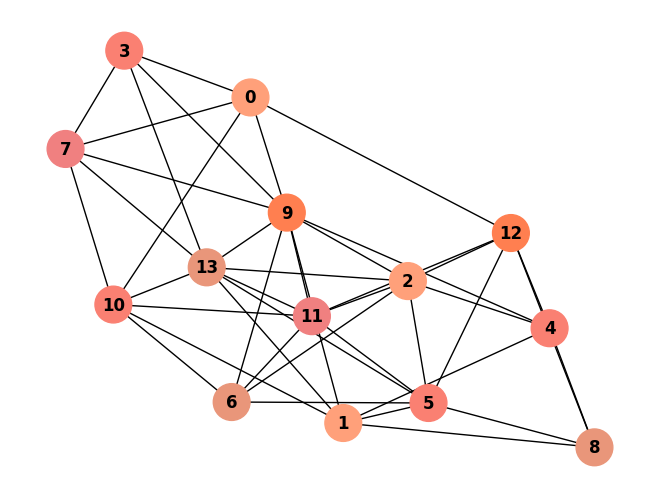

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.
Não foi possível colorir o grafo usando DFS e 5 cores.


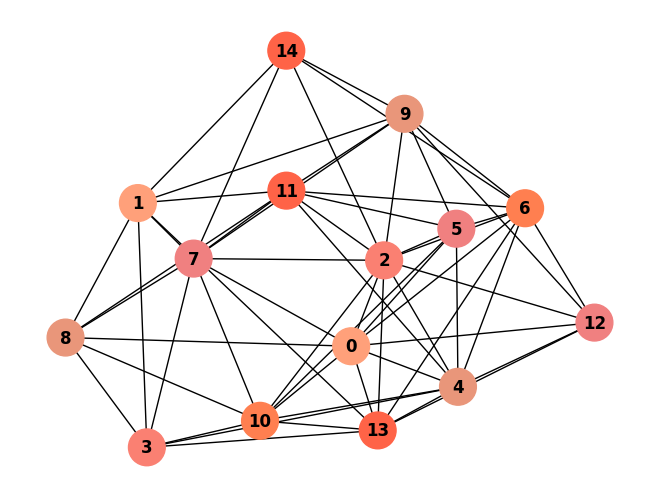

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.


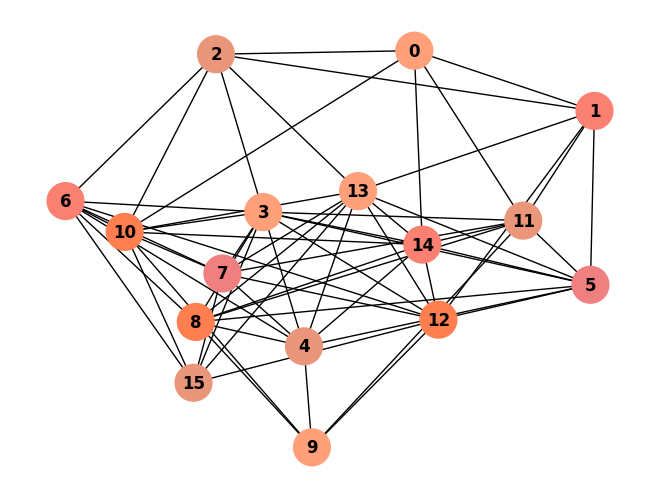

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.


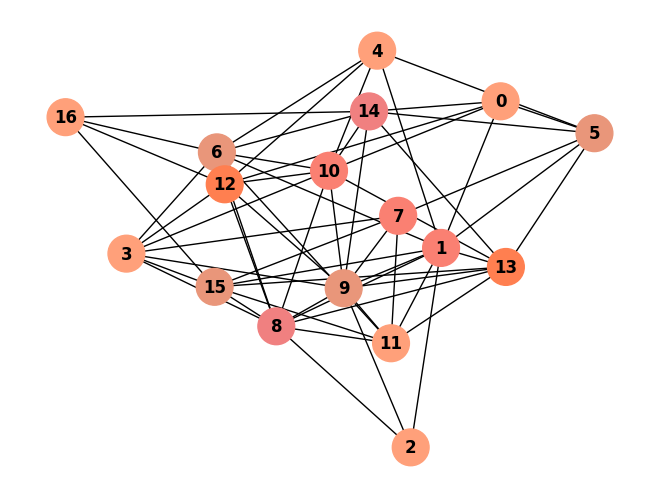

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.


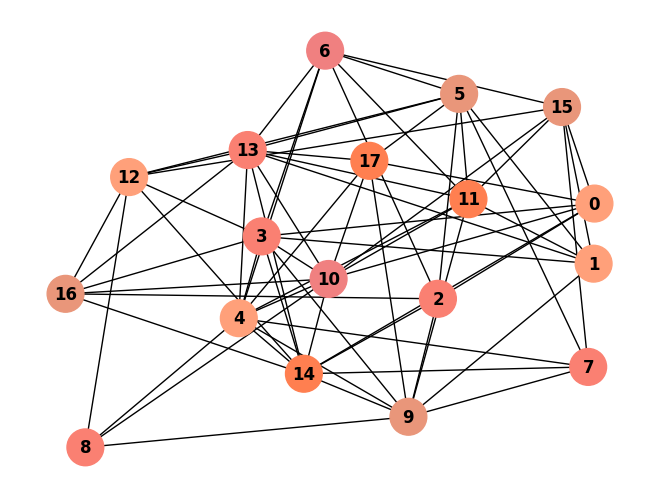

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.
Não foi possível colorir o grafo usando DFS e 5 cores.


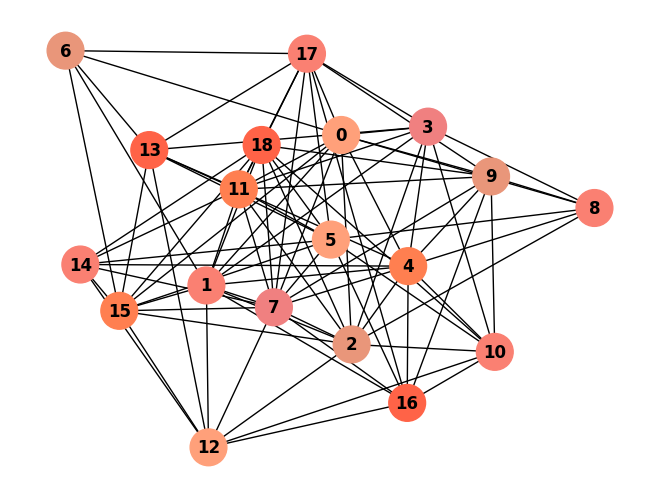

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.


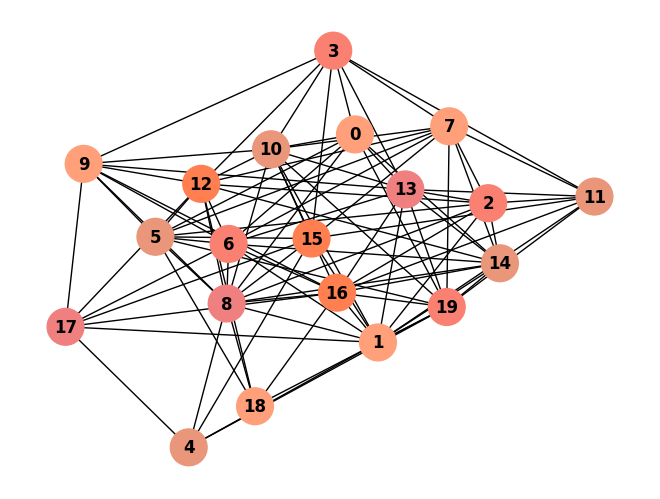

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.
Não foi possível colorir o grafo usando DFS e 5 cores.


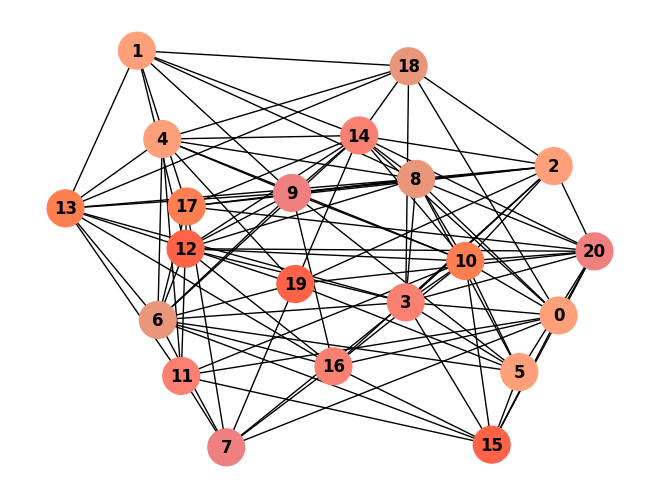

Não foi possível colorir o grafo usando DFS e 0 cores.
Não foi possível colorir o grafo usando DFS e 1 cores.
Não foi possível colorir o grafo usando DFS e 2 cores.
Não foi possível colorir o grafo usando DFS e 3 cores.
Não foi possível colorir o grafo usando DFS e 4 cores.
Não foi possível colorir o grafo usando DFS e 5 cores.


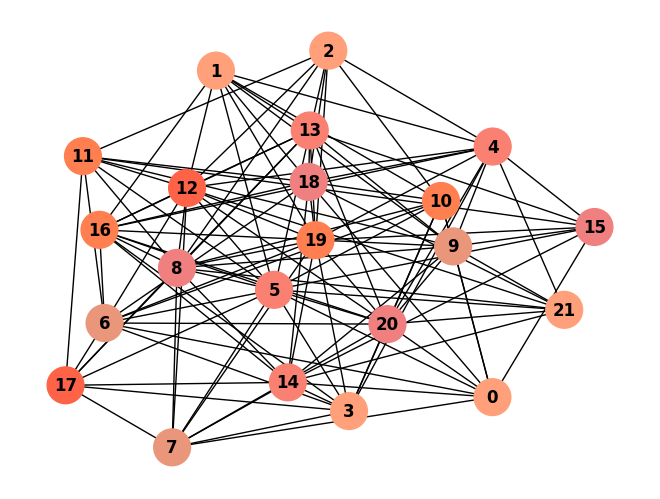

In [ ]:
dfs_times = []
dfs_colors = []
q_times = []
q_colors = []
num_vertices_list = list(range(1, 23))

for num_vertices in num_vertices_list:
    graph = nx.erdos_renyi_graph(n=num_vertices, p=0.5)
    dfs_time, dfs_color = DFS_sample(num_vertices, graph)
    if num_vertices < 12:
          q_time, q_color = Q_sample(num_vertices, graph)
          q_times.append(q_time)
          q_colors.append(q_color)
    dfs_times.append(dfs_time)
    dfs_colors.append(dfs_color)

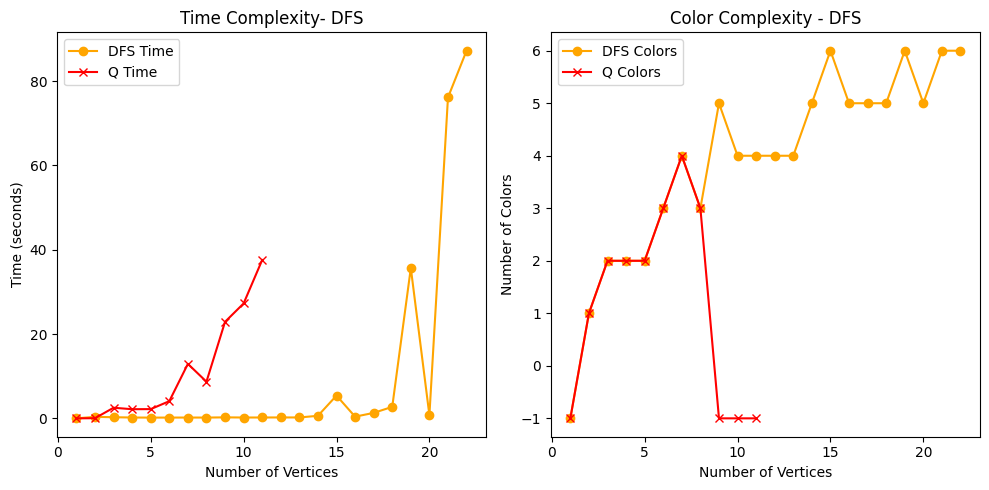

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(num_vertices_list, dfs_times, label='DFS Time', marker='o', color='orange')
plt.plot(num_vertices_list[:11], q_times, label='Q Time', marker='x', color='red')
plt.xlabel('Number of Vertices')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity- DFS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_vertices_list, dfs_colors, label='DFS Colors', marker='o', color='orange')
plt.plot(num_vertices_list[:11], q_colors, label='Q Colors', marker='x', color='red')
plt.xlabel('Number of Vertices')
plt.ylabel('Number of Colors')
plt.title('Color Complexity - DFS')
plt.legend()

plt.tight_layout()
plt.show()